# Approaching (Almost) Any Machine Learning Problem

In [11]:
from sklearn import datasets, manifold, tree, metrics, model_selection

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Table of Content

* [Supervised vs Unsupervised Learning](#Supervised-vs-Unsupervised-Learning)
* [Cross-Validation](#Cross-Validation)

## Supervised vs Unsupervised Learning

In [10]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)

pixel_values, targets = data
targets = targets.astype(int)

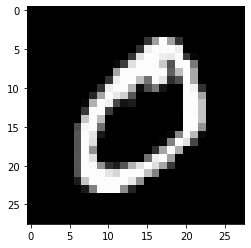

In [11]:
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image, cmap='gray')

In [14]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000,:])

In [15]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=['x','y','targets']
)

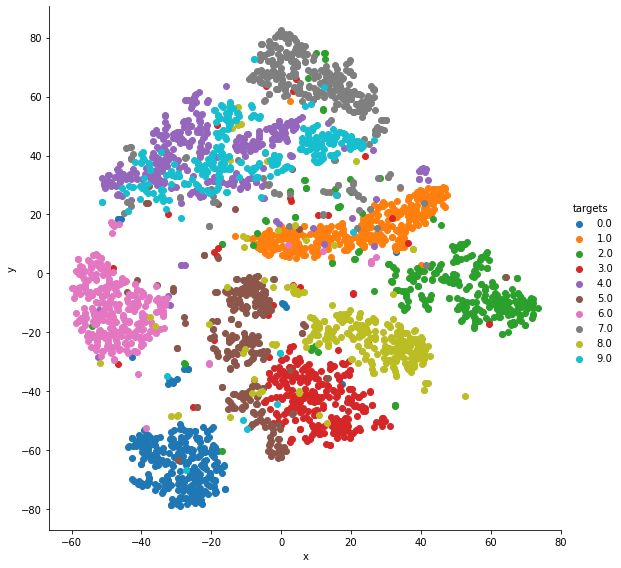

In [17]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, 'x', 'y').add_legend()

## Lessons Learned

* Difference between supervised and unsupervised learning
    * **Supervised Learning:** Data is labeled, and the task at hand is to use a model that'll learn from labelled data to predict the label of new data
    * **Unsupervised Learning:** Data is not labeled, and the task at hand is to use a model that can group data points based on similar characteristics

* How to convert a supervised dataset to a unsupervised dataset to better visualize high-dimensional datasets:
    * A decomposition technique, such as t-SNE or PCA, can be used to reduce the dimensionality of your dataset and visualize it

## Cross-Validation

In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Although `quality` can take any value between 0 and 10, our dataset only contains 6 different values

In [4]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# you can use the map function in pandas with
#any dictionary to convert the values in a
#given column to values in a dictionary
df.loc[:, 'quality'] = df.quality.map(quality_mapping)

In [5]:
df['quality'].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [6]:
# Return a random sample of items
# frac (fraction) indicates the fraction of the dataset to return (1 = 100%)
# Reset index since they change after shuffling the df
df = df.sample(frac=1).reset_index(drop=True)

# Select top 1000 rows for training
df_train = df.head(1000)

# Select bottom 599 for testing/validation
df_test = df.tail(599)

Let's train a decision tree classifier with maximum depth of 3 on this dataset

In [7]:
# Initialize decision tree with maximum depth as 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# Get all the columns that'll be used as features
# ignoring the target variable "quality"
cols = df.loc[:,:'alcohol'].columns

# Fit decision tree classifier on training data
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [8]:
# Generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# Generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# Calculate accuracy on training data
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

# Calculate accuracy on test data
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

print(f'training accuracy is {train_accuracy*100}%')
print(f'test accuracy is {test_accuracy*100}%')

training accuracy is 61.6%
test accuracy is 56.42737896494157%


Let's try again with maximum depth of 5

In [9]:
# Initialize decision tree with maximum depth as 3
clf = tree.DecisionTreeClassifier(max_depth=5)

# Fit decision tree classifier on training data
clf.fit(df_train[cols], df_train.quality)

# Generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# Generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# Calculate accuracy on training data
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

# Calculate accuracy on test data
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

print(f'training accuracy is {train_accuracy*100}%')
print(f'test accuracy is {test_accuracy*100}%')

training accuracy is 68.2%
test accuracy is 58.09682804674458%


Both training and test accuracy went up as we increased the maximum depth of our tree. Next, let's loop through various numbers of `max_depth` values and see which one gives us better accuracy for both our training and test sets

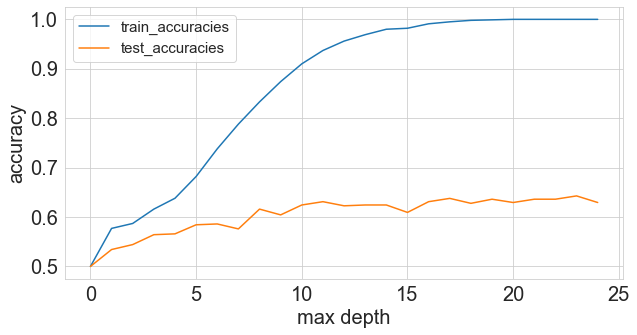

In [10]:
# Set global size of label text on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# Lists to store accuracies for both
# training and test sets. We initialize them
# to 50
training_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1,25):
    # Initialize decision tree with maximum depth as depth
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # Get all the columns that'll be used as features
    # ignoring the target variable "quality"
    cols = df.loc[:,:'alcohol'].columns
    
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    
    # Generate predictions on the training set
    train_predictions = clf.predict(df_train[cols])

    # Generate predictions on the test set
    test_predictions = clf.predict(df_test[cols])
    
    
    # Calculate accuracy on training data
    training_accuracies += [metrics.accuracy_score(
        df_train.quality, train_predictions
    )]

    # Calculate accuracy on test data
    test_accuracies += [metrics.accuracy_score(
        df_test.quality, test_predictions
    )]

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(training_accuracies, label='train_accuracies')
plt.plot(test_accuracies, label='test_accuracies')
plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(range(0,26,5))
plt.xlabel('max depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

We see that the training accuracy continues to increase as we increase the `max_depth` of our decision tree, while the test data platos at a certain point. This indicates that our model is **overfitting** i.e. it learns the training set so well, that it is no longer able to generalize and perform properly on a different dataset. A solution to such a problem is to train using cross validation. The following code snippet will perform **k-fold cross-validation** on our wine quality dataset. We will use 5 folds. Each fold will get a chance to be used as the test set, while the four other folds will be used for training. 

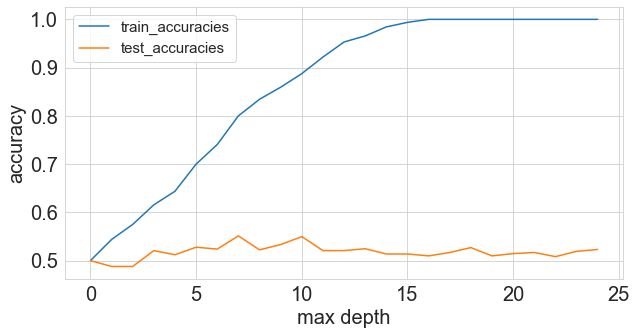

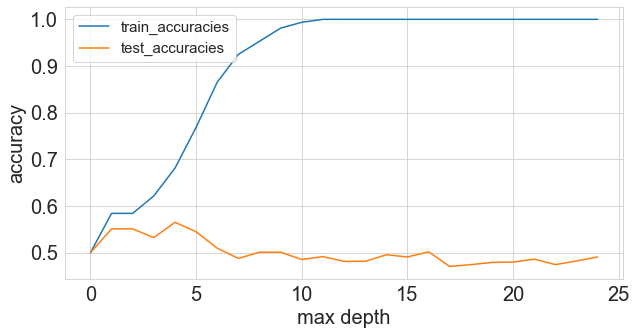

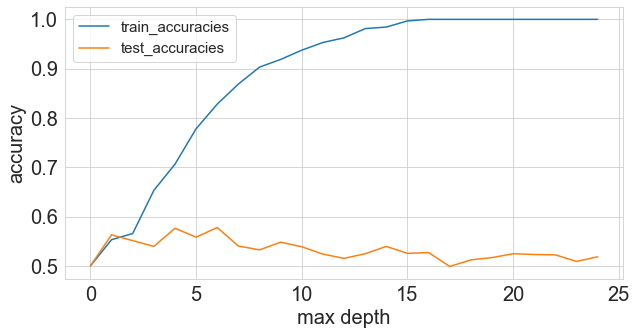

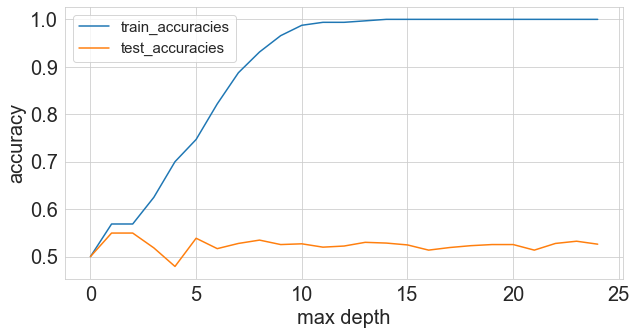

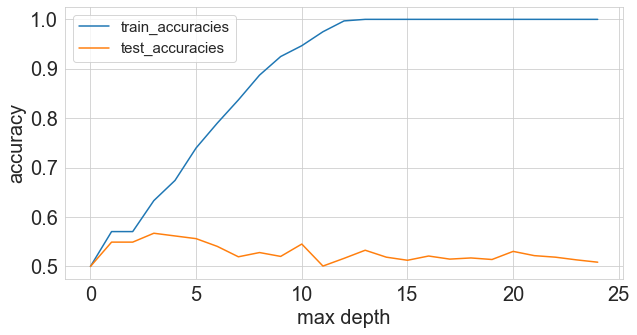

In [16]:
def k_fold_cv(dataset_path, output_path):
    df = pd.read_csv(dataset_path)
    
    df['kfold'] = -1 # add kfold column and fill vals with -1
    
    df = df.sample(frac=1).reset_index(drop=True)
    
    kf = model_selection.KFold(n_splits=5)
    
    # Fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] =  fold
    
    df.to_csv(output_path, index=False)

dataset_path = 'winequality-red.csv'
output_path = 'k_fold_train.csv'
k_fold_cv(dataset_path, output_path)

# Get all the columns that'll be used as features
# ignoring the target variable "quality"
cols = df.loc[:,:'alcohol'].columns

df = pd.read_csv(output_path)


for fold in range(5):
    training_accuracies = [0.5]
    test_accuracies = [0.5]
    for depth in range(1,25):
        
        df_train = df[df['kfold'] == fold]
        df_test =  df[df['kfold'] != fold]
        
        # Initialize decision tree with maximum depth as depth
        clf = tree.DecisionTreeClassifier(max_depth=depth)

        # fit the model on given features
        clf.fit(df_train[cols], df_train.quality)

        # Generate predictions on the training set
        train_predictions = clf.predict(df_train[cols])

        # Generate predictions on the test set
        test_predictions = clf.predict(df_test[cols])


        # Calculate accuracy on training data
        training_accuracies += [metrics.accuracy_score(
            df_train.quality, train_predictions
        )]

        # Calculate accuracy on test data
        test_accuracies += [metrics.accuracy_score(
            df_test.quality, test_predictions
        )]
    plt.figure(figsize=(10,5))
    sns.set_style('whitegrid')
    plt.plot(training_accuracies, label='train_accuracies')
    plt.plot(test_accuracies, label='test_accuracies')
    plt.legend(loc='upper left', prop={'size': 15})
    plt.xticks(range(0,26,5))
    plt.xlabel('max depth', size=20)
    plt.ylabel('accuracy', size=20)
    plt.show()